In [1]:
import numpy as np
import pandas as pd
from math import ceil
import itertools
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Exercise 1:

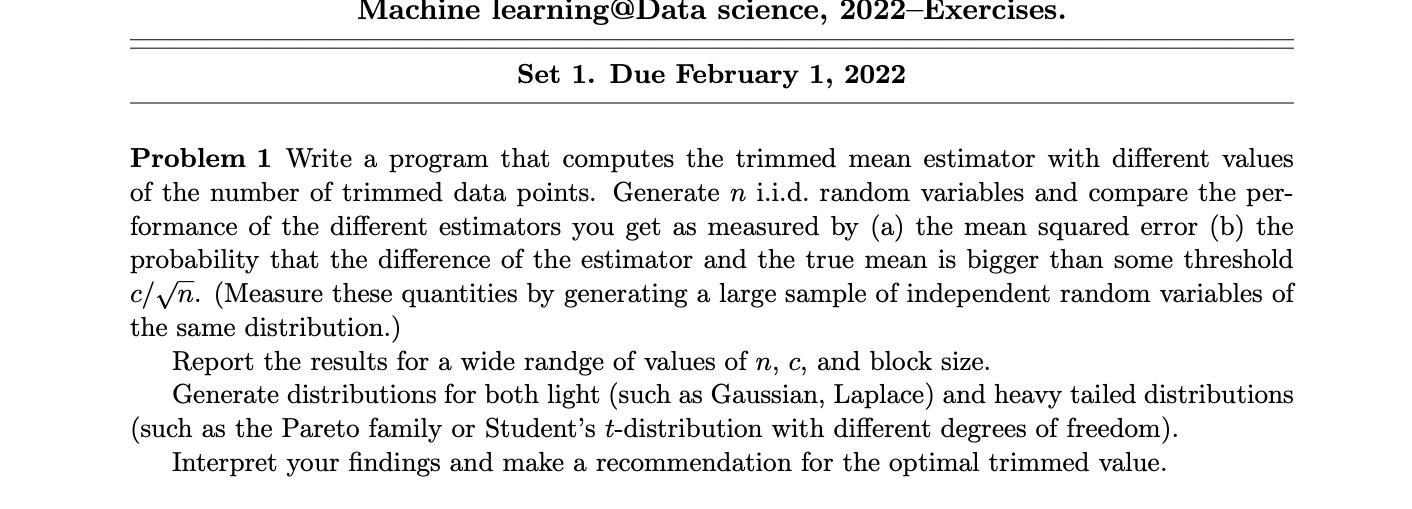

## Generalities:

For this analysis, I chose the following distributions:
- Non-fat tails:
  - Gaussian distribution with parameters $\mu =0$ and $\sigma^2 = 1$
  - Laplacian distribution with parameters $\mu =0$ and $b = 1$
- Fat tails:
  - Student's t distribution with parameters $k = 1$ (for fatter tails)
- Asymmetric distribution:
  - Chi squared distributions with parameter $k = 3$.

## Computations:

Function to compute the MSE:

In [2]:
def mse(distribution, n, trim, deg=None):
  #np.random.seed(123)
  df = pd.DataFrame()

  if distribution == "normal":
    #generate a random sample of n observations from a normal distribution centered in 0 and sd = 1:
    df["random_sample"] = list(np.random.normal(0,1,n))
    true_mean = 0
  
  elif distribution == "laplace":
    #generate a random sample of n observations from a laplace distribution centered in 0 with scale = 1:
    df["random_sample"] = list(np.random.laplace(0,1,n))
    true_mean = 0

  elif distribution == "t_student":
    #generate a random sample of n observations from a student's t distribution with 'deg' degrees of freedom:
    df["random_sample"] = list(np.random.standard_t(deg,n))
    true_mean = 0

  elif distribution == "chi_squared":
    #generate a random sample of n observations from a chi squared distribution with 'deg' degrees of freedom:
    df["random_sample"] = list(np.random.chisquare(deg,n))
    true_mean = deg

  #drop trim-lowest and trim-highest values and compute mean of the remaining observations: 
  trimmed_mean = df.sort_values("random_sample").iloc[trim:n-trim].mean().to_numpy()[0]

  #compute mean squared error:
  mse = (trimmed_mean - true_mean)**2

  return mse

#trimmed_mean("t_student", 100, 10, 1)

Function to plot the MSE:

In [4]:
def plot_mse(n, m, k):
  #m is the amount data sets of n observations we create
  df = pd.DataFrame()
  normal = []
  laplace = []
  t_student = []
  chi_squared = []

  for trim in range(k+1):

    df["mse_normal"] = [mse("normal", n, trim) for i in range(m)]
    df["mse_laplace"] = [mse("laplace", n, trim) for i in range(m)]
    df["mse_t_student"] = [mse("t_student", n, trim, 1) for i in range(m)]
    df["mse_chi_squared"] = [mse("chi_squared", n, trim, 3) for i in range(m)]
    normal.append(df["mse_normal"].mean())
    laplace.append(df["mse_laplace"].mean())
    t_student.append(df["mse_t_student"].mean())
    chi_squared.append(df["mse_chi_squared"].mean())


  fig = plt.figure(figsize=(6,4))
  plt.plot(list(range(k+1)), normal, label="normal")  
  plt.plot(list(range(k+1)), laplace, label="laplace") 
  plt.plot(list(range(k+1)), t_student, label="t_student")  
  plt.plot(list(range(k+1)), chi_squared, label="chi_squared")
  plt.legend()
  plt.title("MSE vs k, for different distributions (n = {0}, m = {1})".format(n, m), fontsize = 16)
  plt.xlabel("k", fontsize = 16)
  plt.xticks(np.arange(0, k+1, k/4))
  plt.ylim([0, 1.5])
  #plt.yticks(np.arange(0, 5, 1))
  plt.ylabel("MSE", fontsize = 16)

Plot the MSE:

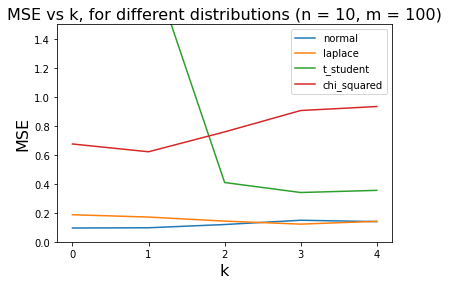

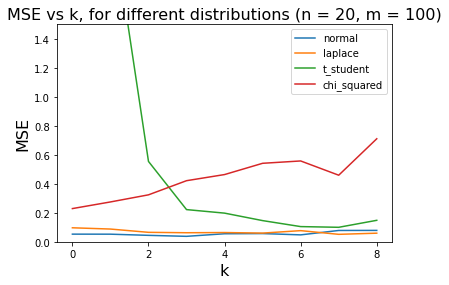

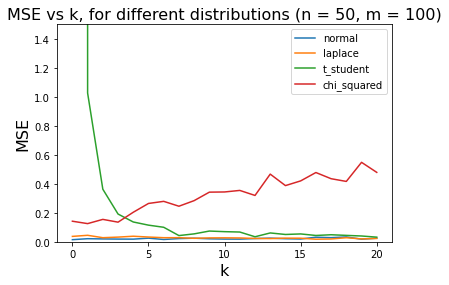

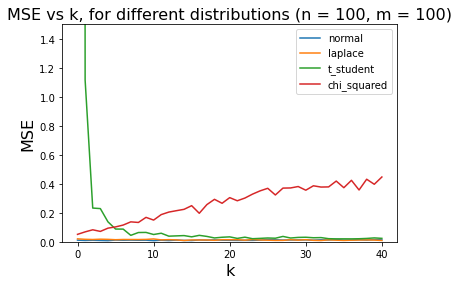

In [5]:
plot_mse(10, 100, 4)
plot_mse(20, 100, 8)
plot_mse(50, 100, 20)
plot_mse(100, 100, 40)

Function to compute:
- The absolute value of the difference between the trimmed mean and the true mean.
- The threshold.
- An indicator that equals 1 when the difference is larger than the threshold.

In [6]:
def abs_diff(distribution, n, trim, c, deg=None):
  #np.random.seed(123)
  df = pd.DataFrame()

  if distribution == "normal":
    #generate a random sample of n observations from a normal distribution centered in 0 and sd = 1:
    df["random_sample"] = list(np.random.normal(0,1,n))
    true_mean = 0
  
  elif distribution == "laplace":
    #generate a random sample of n observations from a laplace distribution centered in 0 with scale = 1:
    df["random_sample"] = list(np.random.laplace(0,1,n))
    true_mean = 0

  elif distribution == "t_student":
    #generate a random sample of n observations from a student's t distribution with 'deg' degrees of freedom:
    df["random_sample"] = list(np.random.standard_t(deg,n))
    true_mean = 0

  elif distribution == "chi_squared":
    #generate a random sample of n observations from a chi squared distribution with 'deg' degrees of freedom:
    df["random_sample"] = list(np.random.chisquare(deg,n))
    true_mean = deg

  #drop trim-lowest and trim-highest values and compute mean of the remaining observations: 
  trimmed_mean = df.sort_values("random_sample").iloc[trim:n-trim].mean().to_numpy()[0]

  #compute absolute difference:
  abs_diff = abs(trimmed_mean - true_mean)

  #check if that magnitude is greater than our threshold:
  threshold = c/(n**0.5)
  
  if abs_diff > threshold:
    indicator = 1
  else:
    indicator = 0

  return abs_diff, threshold, indicator


abs_diff("t_student", 100, 10, 1, 2)

(0.2516329414802624, 0.1, 1)

Function to plot the probability that the absolute value of the difference between the estimated mean (trimmed) and the true mean is greater than some threshold:

In [7]:
def plot_probability(n, m, k, c):
  df = pd.DataFrame()
  normal = []
  laplace = []
  t_student = []
  chi_squared = []

  for trim in range(k+1):

    df["indicator_normal"] = [abs_diff("normal", n, trim, c)[2] for i in range(m)]
    df["indicator_laplace"] = [abs_diff("laplace", n, trim, c)[2] for i in range(m)]
    df["indicator_t_student"] = [abs_diff("t_student", n, trim, c, 1)[2] for i in range(m)]
    df["indicator_chi_squared"] = [abs_diff("chi_squared", n, trim, c, 3)[2] for i in range(m)]
    
    #compute probabilities as the mean of the vector with 1s and 0s (indicator function):
    normal.append(df["indicator_normal"].mean())
    laplace.append(df["indicator_laplace"].mean())
    t_student.append(df["indicator_t_student"].mean())
    chi_squared.append(df["indicator_chi_squared"].mean())


  fig = plt.figure(figsize=(6,4))
  plt.plot(list(range(k+1)), normal, label="normal")  
  plt.plot(list(range(k+1)), laplace, label="laplace") 
  plt.plot(list(range(k+1)), t_student, label="t_student")  
  plt.plot(list(range(k+1)), chi_squared, label="chi_squared")
  plt.legend()
  plt.title("Probability of difference being larger than threshold vs k, \nfor different distributions (n = {0}, m = {1}, c = {2})".format(n, m, c), fontsize = 14, pad=20)
  plt.xlabel("k", fontsize = 16)
  plt.xticks(np.arange(0, k+1, k/4))
  plt.ylim([0, 1])
  plt.ylabel("P", fontsize = 16)

Plot probabilities for c = 1:

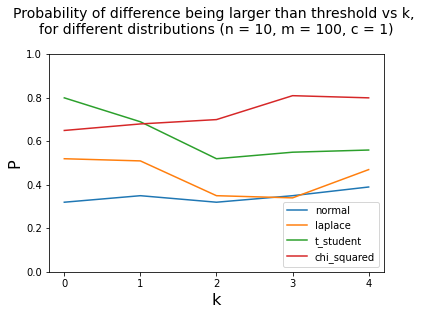

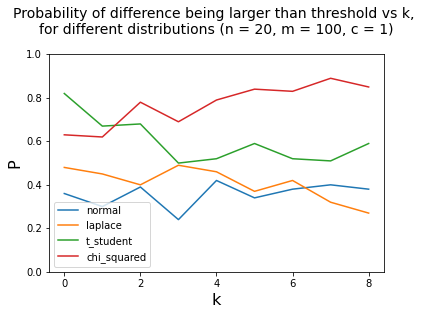

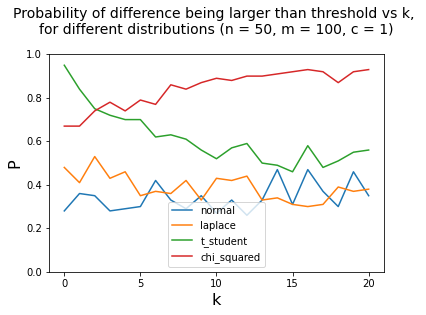

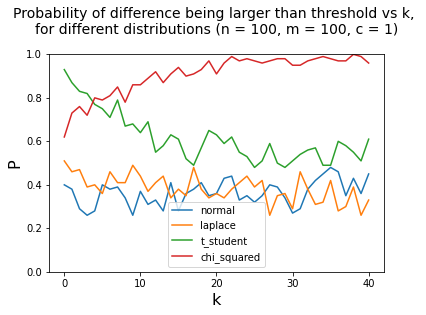

In [8]:
plot_probability(10, 100, 4, 1)
plot_probability(20, 100, 8, 1)
plot_probability(50, 100, 20, 1)
plot_probability(100, 100, 40, 1)

For a looser threshold (c = 2):

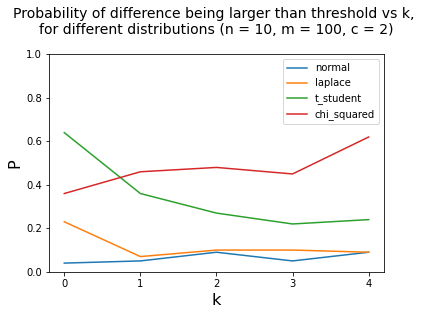

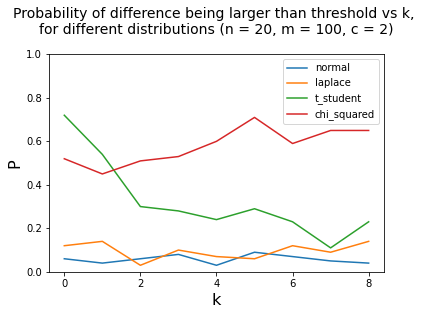

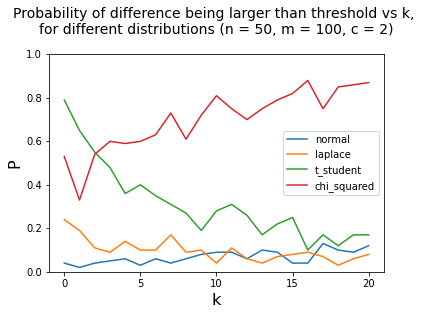

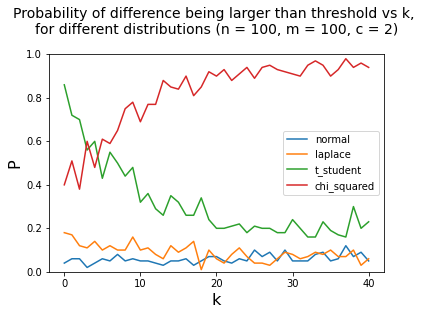

In [9]:
plot_probability(10, 100, 4, 2)
plot_probability(20, 100, 8, 2)
plot_probability(50, 100, 20, 2)
plot_probability(100, 100, 40, 2)

Even looser (c = 5):

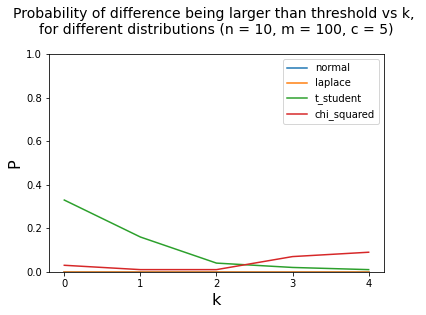

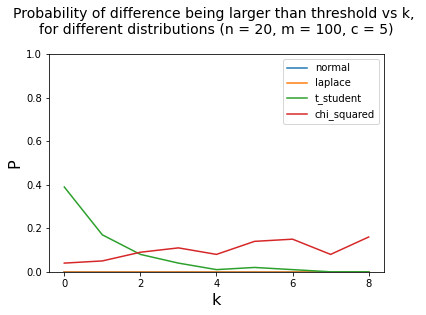

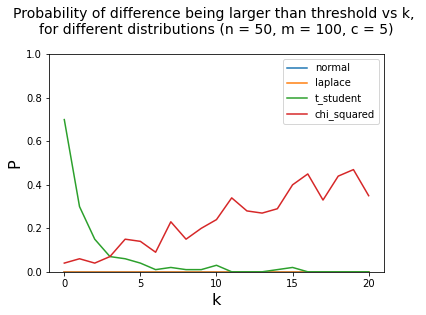

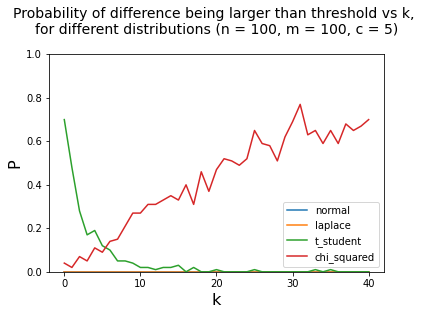

In [10]:
plot_probability(10, 100, 4, 5)
plot_probability(20, 100, 8, 5)
plot_probability(50, 100, 20, 5)
plot_probability(100, 100, 40, 5)

## Conclusions:
Analysing the MSE and Probabilities of the estimators being very different from the real mean, I observe that:

- As the quantity of observations we trim increases:
  - The estimator for the fat tailed distribution gets better. This makes sense, since it removes very extreme values, which are quite likely in fat tailed distributions, that would otherwise impact heavily on the mean.
  - The estimator for the asymmetric distribution worsens systematically. This also makes sense, since the values being removed correspond to "unevenly" distributed.
  - The estimators for both thin tailed distributions show no significant change.

The trends become clearer as $n$ increases.

I would recommend trimming 0 values for asymmetric and thin tailed distributions; and it seems to make sense to trim large percentages of the extreme points of data for fat tailed distributions.


# Problem 4

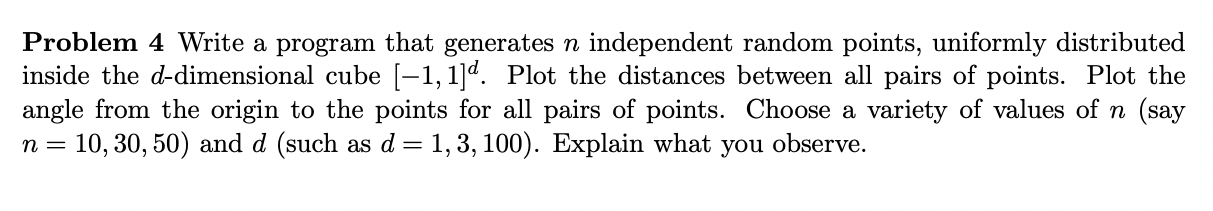

## Analysis:

Generate random points:

In [11]:
def generate_points(n, d):
  df = pd.DataFrame(np.random.uniform(low=-1.0, high=1.0, size=d)).transpose()
  df.columns = ["x{0}".format(i+1) for i in range(d)]  

  for i in range(n-1):
    df1 = pd.DataFrame(np.random.uniform(low=-1.0, high=1.0, size=d)).transpose()
    df1.columns = ["x{0}".format(i+1) for i in range(d)]  
    df = df.append(df1, ignore_index=True)

  return df

Pairwise combinations, distances and angles:

In [12]:
def generate_points_and_get_dists_angles(n, d):
  df = pd.DataFrame(np.random.uniform(low=-1.0, high=1.0, size=d)).transpose()
  df.columns = ["x{0}".format(i+1) for i in range(d)]  

  for i in range(n-1):
    df1 = pd.DataFrame(np.random.uniform(low=-1.0, high=1.0, size=d)).transpose()
    df1.columns = ["x{0}".format(i+1) for i in range(d)]  
    df = df.append(df1, ignore_index=True)

  samples = df

  df4 = pd.DataFrame(list(itertools.combinations(list(range(n)), 2)))
  df4.columns = ["obs_i", "obs_j"]

  distances = []
  for i in range(df4.shape[0]):
    distances.append(distance.euclidean(samples.iloc[df4.iloc[i][0]], samples.iloc[df4.iloc[i][1]]))
  df4["dist(i, j)"] = distances
  
  dots = []
  l2_norm_i = []
  l2_norm_j = []

  for i in range(df4.shape[0]):
    dots.append(np.dot(samples.iloc[int(df4.iloc[i][0])], samples.iloc[int(df4.iloc[i][1])]))
    l2_norm_i.append(np.dot(samples.iloc[int(df4.iloc[i][0])], samples.iloc[int(df4.iloc[i][0])])**0.5)
    l2_norm_j.append(np.dot(samples.iloc[int(df4.iloc[i][1])], samples.iloc[int(df4.iloc[i][1])])**0.5)

  df4["dot(i,j)"] = dots
  df4["L2 norm_i"] = l2_norm_i
  df4["L2 norm_j"] = l2_norm_j
  df4["angle(i,j)"] = np.arccos(df4["dot(i,j)"]/(df4["L2 norm_i"]*df4["L2 norm_j"]))*180/np.pi
  df4 = df4.drop(["dot(i,j)", "L2 norm_i", "L2 norm_j"], axis =1)
  
  return df4

In [15]:
generate_points_and_get_dists_angles(3, 5)

,obs_i,obs_j,"dist(i, j)","angle(i,j)"
0,0,1,1.492055,68.179417
1,0,2,1.941799,87.633824
2,1,2,1.892455,81.414073


Plot for n = 10, and varying dimensions (1, 3, 10, 50, 100):



Text(0.5, 1.0, 'dim = 100')

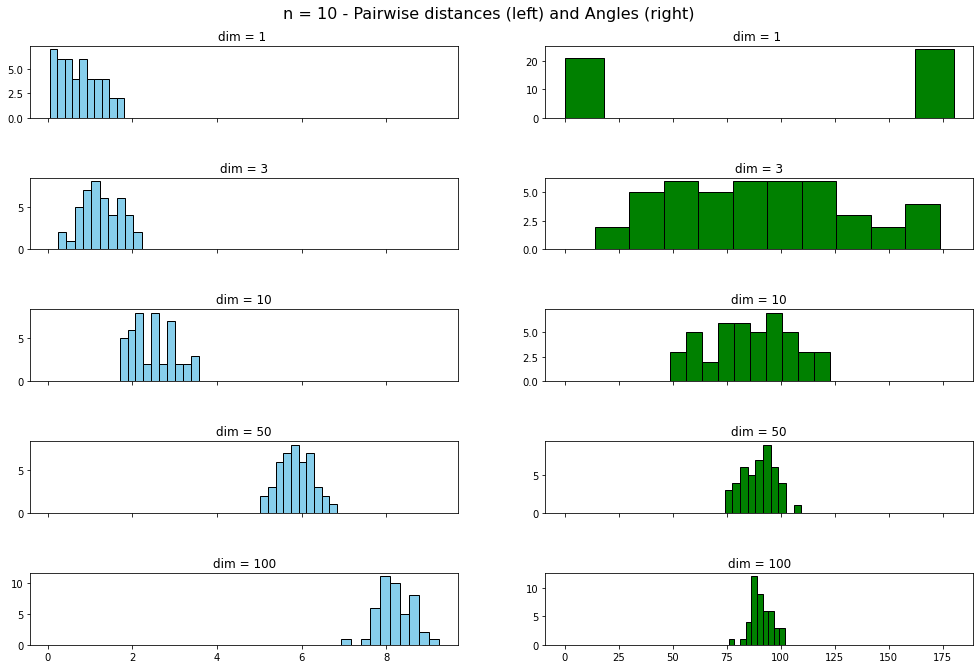

In [16]:
a = generate_points_and_get_dists_angles(10, 1)
b = generate_points_and_get_dists_angles(10, 3)
c = generate_points_and_get_dists_angles(10, 10)
d = generate_points_and_get_dists_angles(10, 50)
e = generate_points_and_get_dists_angles(10, 100)

fig, axs = plt.subplots(5, 2, sharex="col", figsize=(15,10))
fig.suptitle('n = 10 - Pairwise distances (left) and Angles (right) ', fontsize=16)
fig.tight_layout(pad=5.0)
axs[0, 0].hist(a["dist(i, j)"], color = "skyblue", ec="black")
axs[0, 0].set_title('dim = 1 ')
axs[1, 0].hist(b["dist(i, j)"], color = "skyblue", ec="black")
axs[1, 0].set_title('dim = 3')
axs[2, 0].hist(c["dist(i, j)"], color = "skyblue", ec="black")
axs[2, 0].set_title('dim = 10')
axs[3, 0].hist(d["dist(i, j)"], color = "skyblue", ec="black")
axs[3, 0].set_title('dim = 50')
axs[4, 0].hist(e["dist(i, j)"], color = "skyblue", ec="black")
axs[4, 0].set_title('dim = 100')
    
axs[0, 1].hist(a["angle(i,j)"], color = "green", ec="black")
axs[0, 1].set_title('dim = 1 ')
axs[1, 1].hist(b["angle(i,j)"], color = "green", ec="black")
axs[1, 1].set_title('dim = 3')
axs[2, 1].hist(c["angle(i,j)"], color = "green", ec="black")
axs[2, 1].set_title('dim = 10')
axs[3, 1].hist(d["angle(i,j)"], color = "green", ec="black")
axs[3, 1].set_title('dim = 50')
axs[4, 1].hist(e["angle(i,j)"], color = "green", ec="black")
axs[4, 1].set_title('dim = 100')

Plot for n = 30, and varying dimensions (1, 3, 10, 50, 100):


Text(0.5, 1.0, 'dim = 100')

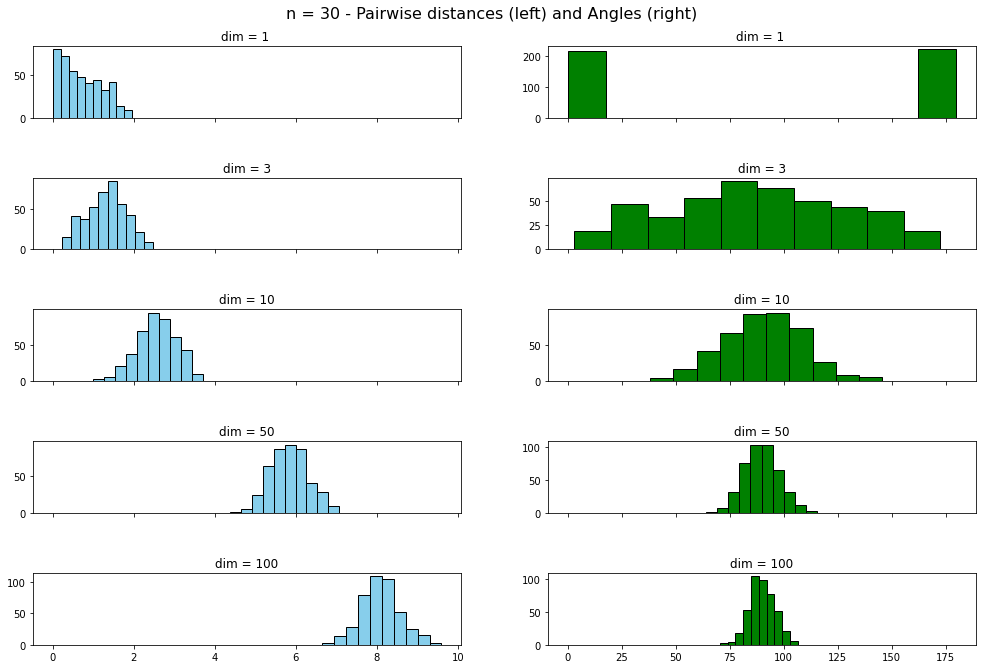

In [17]:
a = generate_points_and_get_dists_angles(30, 1)
b = generate_points_and_get_dists_angles(30, 3)
c = generate_points_and_get_dists_angles(30, 10)
d = generate_points_and_get_dists_angles(30, 50)
e = generate_points_and_get_dists_angles(30, 100)

fig, axs = plt.subplots(5, 2, sharex="col", figsize=(15,10))
fig.suptitle('n = 30 - Pairwise distances (left) and Angles (right) ', fontsize=16)
fig.tight_layout(pad=5.0)
axs[0, 0].hist(a["dist(i, j)"], color = "skyblue", ec="black")
axs[0, 0].set_title('dim = 1 ')
axs[1, 0].hist(b["dist(i, j)"], color = "skyblue", ec="black")
axs[1, 0].set_title('dim = 3')
axs[2, 0].hist(c["dist(i, j)"], color = "skyblue", ec="black")
axs[2, 0].set_title('dim = 10')
axs[3, 0].hist(d["dist(i, j)"], color = "skyblue", ec="black")
axs[3, 0].set_title('dim = 50')
axs[4, 0].hist(e["dist(i, j)"], color = "skyblue", ec="black")
axs[4, 0].set_title('dim = 100')
    
axs[0, 1].hist(a["angle(i,j)"], color = "green", ec="black")
axs[0, 1].set_title('dim = 1 ')
axs[1, 1].hist(b["angle(i,j)"], color = "green", ec="black")
axs[1, 1].set_title('dim = 3')
axs[2, 1].hist(c["angle(i,j)"], color = "green", ec="black")
axs[2, 1].set_title('dim = 10')
axs[3, 1].hist(d["angle(i,j)"], color = "green", ec="black")
axs[3, 1].set_title('dim = 50')
axs[4, 1].hist(e["angle(i,j)"], color = "green", ec="black")
axs[4, 1].set_title('dim = 100')

Plot for n = 50, and varying dimensions (1, 3, 10, 50, 100):


Text(0.5, 1.0, 'dim = 100')

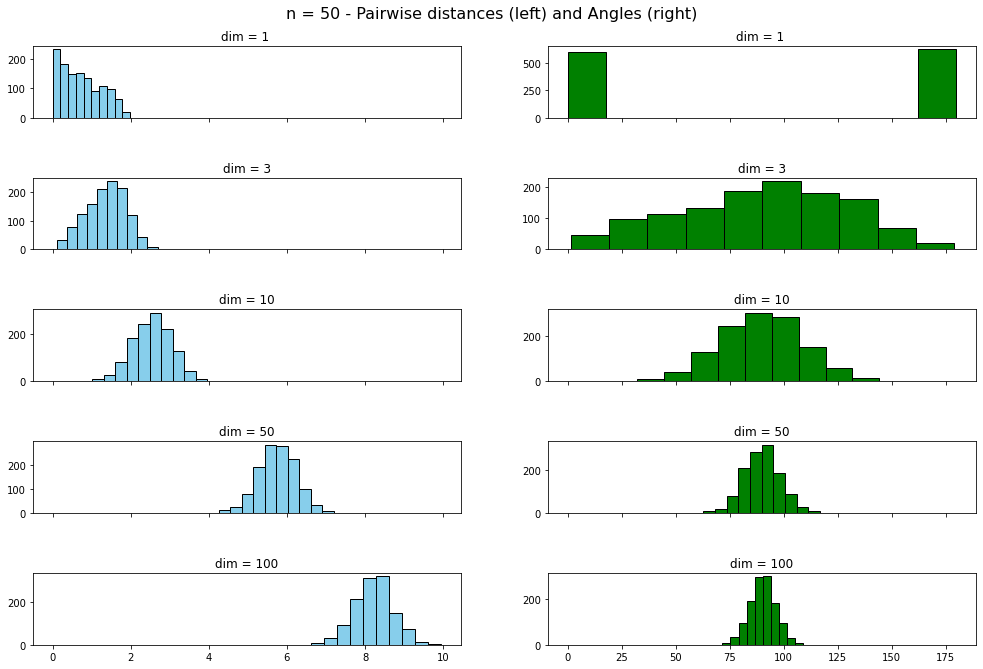

In [18]:
a = generate_points_and_get_dists_angles(50, 1)
b = generate_points_and_get_dists_angles(50, 3)
c = generate_points_and_get_dists_angles(50, 10)
d = generate_points_and_get_dists_angles(50, 50)
e = generate_points_and_get_dists_angles(50, 100)

fig, axs = plt.subplots(5, 2, sharex="col", figsize=(15,10))
fig.suptitle('n = 50 - Pairwise distances (left) and Angles (right) ', fontsize=16)
fig.tight_layout(pad=5.0)
axs[0, 0].hist(a["dist(i, j)"], color = "skyblue", ec="black")
axs[0, 0].set_title('dim = 1 ')
axs[1, 0].hist(b["dist(i, j)"], color = "skyblue", ec="black")
axs[1, 0].set_title('dim = 3')
axs[2, 0].hist(c["dist(i, j)"], color = "skyblue", ec="black")
axs[2, 0].set_title('dim = 10')
axs[3, 0].hist(d["dist(i, j)"], color = "skyblue", ec="black")
axs[3, 0].set_title('dim = 50')
axs[4, 0].hist(e["dist(i, j)"], color = "skyblue", ec="black")
axs[4, 0].set_title('dim = 100')
    
axs[0, 1].hist(a["angle(i,j)"], color = "green", ec="black")
axs[0, 1].set_title('dim = 1 ')
axs[1, 1].hist(b["angle(i,j)"], color = "green", ec="black")
axs[1, 1].set_title('dim = 3')
axs[2, 1].hist(c["angle(i,j)"], color = "green", ec="black")
axs[2, 1].set_title('dim = 10')
axs[3, 1].hist(d["angle(i,j)"], color = "green", ec="black")
axs[3, 1].set_title('dim = 50')
axs[4, 1].hist(e["angle(i,j)"], color = "green", ec="black")
axs[4, 1].set_title('dim = 100')

##Conclusions: 
1. As the number of dimensions of the cube increases:
 - So do the distances between the points, and the extreme cases (distance = 0 and distance = $2 \sqrt{d}$) become more unlikely.
 - The angles between the different points tend to concentrate around 90º

2. As the number of random points considered increases:
 - So does the computational times required to compute the pairwise combinations, due to its factorial nature: $\frac{n!}{k!(n-k)!}$
 - The histograms resemble better the true distributions of distances and angles.
